# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Zanoli

Student name: Alessandro
    
ID: 2057447

In [1]:
#load the required packages

%matplotlib inline  

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2057447
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 
# (labels go from 0 to 9)

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
good_to_go=False
while not good_to_go:

    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 600
    m_test = 4000

    X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
    y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

    labels, freqs = np.unique(y_train, return_counts=True)
    print("Labels in training dataset: ", labels)
    print("Frequencies in training dataset: ", freqs)

    if True not in (freqs < 10):
        good_to_go = True


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [53 71 62 63 55 44 58 70 69 55]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


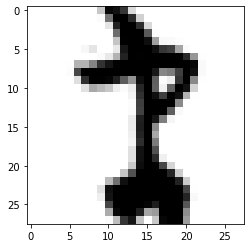

LABEL: 6
INPUT:


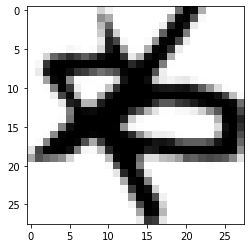

LABEL: 7
INPUT:


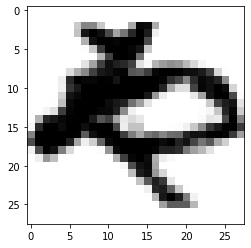

LABEL: 7
INPUT:


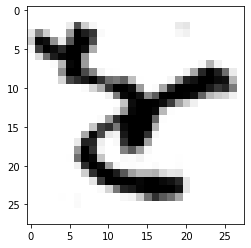

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.775
All scores on the grid:

0.767 (+/-0.023) for {'C': 0.01}

0.775 (+/-0.079) for {'C': 0.1}

0.775 (+/-0.079) for {'C': 1}

0.775 (+/-0.079) for {'C': 10}



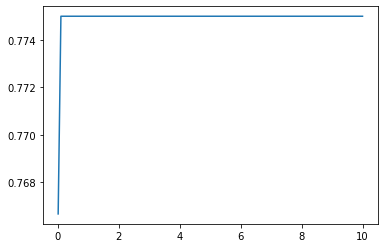

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

model = GridSearchCV(SVC(kernel='linear'),parameters,return_train_score=True,cv=4)

model.fit(X_train,y_train)


print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(model.best_params_)

print("Score with best parameters:")
print(model.best_score_)

print("All scores on the grid:")
print()

means = model.cv_results_["mean_test_score"]
stds = model.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, model.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pd.DataFrame(pd.DataFrame(model.cv_results_["params"])["C"]),means)

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [11]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
model = GridSearchCV(SVC(kernel='poly',degree=2),parameters,return_train_score=True,cv=4)

model.fit(X_train,y_train)
# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(model.best_params_)

print("Score with best parameters:")
print(model.best_score_)

print("\nAll scores on the grid:")
means = model.cv_results_["mean_test_score"]
stds = model.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, model.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()



RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.81

All scores on the grid:
0.125 (+/-0.026) for {'C': 0.01, 'gamma': 0.01}

0.778 (+/-0.051) for {'C': 0.01, 'gamma': 0.1}

0.810 (+/-0.045) for {'C': 0.01, 'gamma': 1}

0.388 (+/-0.101) for {'C': 0.1, 'gamma': 0.01}

0.808 (+/-0.041) for {'C': 0.1, 'gamma': 0.1}

0.810 (+/-0.045) for {'C': 0.1, 'gamma': 1}

0.778 (+/-0.051) for {'C': 1, 'gamma': 0.01}

0.810 (+/-0.045) for {'C': 1, 'gamma': 0.1}

0.810 (+/-0.045) for {'C': 1, 'gamma': 1}



## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [12]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

model = GridSearchCV(SVC(kernel='poly',degree=degree),parameters,return_train_score=True,cv=4)

model.fit(X_train,y_train)


print ('RESULTS FOR POLY DEGREE=3 KERNEL')

print("Best parameters set found:")
print(model.best_params_)

print("Score with best parameters:")
print(model.best_score_)

print("\nAll scores on the grid:")
means = model.cv_results_["mean_test_score"]
stds = model.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, model.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

RESULTS FOR POLY DEGREE=3 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.745

All scores on the grid:
0.122 (+/-0.015) for {'C': 0.01, 'gamma': 0.01}

0.745 (+/-0.079) for {'C': 0.01, 'gamma': 0.1}

0.735 (+/-0.083) for {'C': 0.01, 'gamma': 1}

0.347 (+/-0.041) for {'C': 0.1, 'gamma': 0.01}

0.735 (+/-0.083) for {'C': 0.1, 'gamma': 0.1}

0.735 (+/-0.083) for {'C': 0.1, 'gamma': 1}

0.693 (+/-0.070) for {'C': 1, 'gamma': 0.01}

0.735 (+/-0.083) for {'C': 1, 'gamma': 0.1}

0.735 (+/-0.083) for {'C': 1, 'gamma': 1}



## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [13]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

model = GridSearchCV(SVC(kernel='rbf'),parameters,return_train_score=True,cv=4)

model.fit(X_train,y_train)


print ('RESULTS FOR RBF KERNEL')

print("Best parameters set found:")
print(model.best_params_)

print("Score with best parameters:")
print(model.best_score_)

print("\nAll scores on the grid:")
means = model.cv_results_["mean_test_score"]
stds = model.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, model.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    

RESULTS FOR RBF KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8283333333333334

All scores on the grid:
0.138 (+/-0.071) for {'C': 0.1, 'gamma': 0.001}

0.200 (+/-0.019) for {'C': 0.1, 'gamma': 0.01}

0.122 (+/-0.015) for {'C': 0.1, 'gamma': 0.1}

0.117 (+/-0.007) for {'C': 0.1, 'gamma': 1}

0.633 (+/-0.087) for {'C': 1, 'gamma': 0.001}

0.795 (+/-0.062) for {'C': 1, 'gamma': 0.01}

0.193 (+/-0.095) for {'C': 1, 'gamma': 0.1}

0.117 (+/-0.007) for {'C': 1, 'gamma': 1}

0.798 (+/-0.058) for {'C': 10, 'gamma': 0.001}

0.828 (+/-0.092) for {'C': 10, 'gamma': 0.01}

0.215 (+/-0.092) for {'C': 10, 'gamma': 0.1}

0.118 (+/-0.006) for {'C': 10, 'gamma': 1}

0.795 (+/-0.071) for {'C': 100, 'gamma': 0.001}

0.828 (+/-0.092) for {'C': 100, 'gamma': 0.01}

0.215 (+/-0.092) for {'C': 100, 'gamma': 0.1}

0.118 (+/-0.006) for {'C': 100, 'gamma': 1}



## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

*ANSWER* 
The absolute best performance over the cross-validated test sets was obtained by applying a rbf kernel. This suggests that the separation between different types of characters is more complex than what could be seen in a linear or polynomial space, and that Kuzushiji symbols of the same type are clustered together in the features space in a way that RBF best captures, if we set the appropriate notion of closeness (gamma=0.01, clusters are quite large) and margin (C=10).

## TO DO 5
Report here the best SVM kernel and parameters

In [14]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf',C=10,gamma=0.01)

# ADD YOUR CODE

best_SVM.fit(X_train,y_train)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: {:.2%}".format(training_error))
print ("Best SVM test error: {:.2%}".format(test_error))

Best SVM training error: 0.00%
Best SVM test error: 18.43%


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


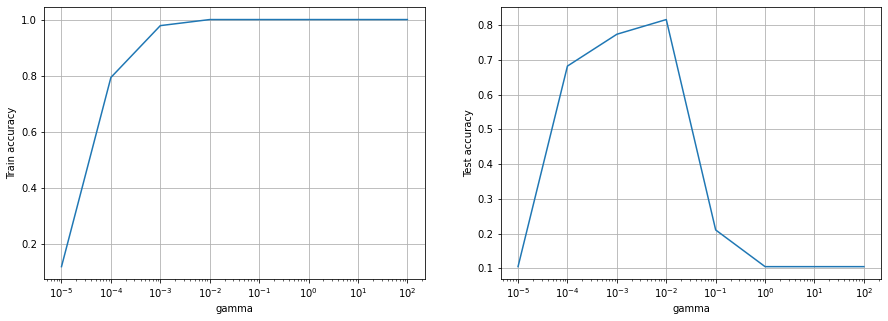

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gamma in gamma_values:
    best_SVM.gamma=gamma
    best_SVM.fit(X_train,y_train)
    train_acc_list.append(best_SVM.score(X_train,y_train))
    test_acc_list.append(best_SVM.score(X_test,y_test))


# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

**ANSWER**
A low gamma (high standard deviation, "closeness" is considered to be very far) fails to understand clusters of data points corresponding to different characters, both in training and test set. On the other end, a high gamma perfectly encloses every data point of the training set in its category, but fails to understand new data points even slightly different from the training ones but belonging to the same category: we have overfitting. Best gamma appears to be `gamma=1e-2`

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

# total number of samples is 60000

m_training = 3000 # TODO number of data points, adjust depending on the capabilities of your PC
                  # homework's default was 2000, changed it to 3000
                  # note: 3000 samples took 182 sec of training on my laptop.

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [258 291 281 292 312 311 284 339 318 314]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf',C=10,gamma=0.01)

# ADD YOUR CODE

best_SVM.fit(X_train,y_train)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: {:.2%}".format(training_error))
print ("Best SVM test error: {:.2%}".format(test_error))

Best SVM training error: 0.00%
Best SVM test error: 9.49%


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

logreg=linear_model.LogisticRegression(C=1e6,max_iter=10000)
X_train_norm=sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_test_norm=sklearn.preprocessing.StandardScaler().fit_transform(X_test)

logreg.fit(X_train_norm,y_train)
training_error = 1-logreg.score(X_train_norm,y_train)
test_error = 1-logreg.score(X_test_norm,y_test)


print ("Best logistic regression training error: {:.2%}".format(training_error))
print ("Best logistic regression test error: {:.2%}".format(test_error))

Best logistic regression training error: 0.00%
Best logistic regression test error: 28.05%


## TO DO 9 Try  with regularization (use C=1)¶

In [20]:
# ADD YOUR CODE

logreg.C=1

logreg.fit(X_train_norm,y_train)
training_error = 1-logreg.score(X_train_norm,y_train)
test_error = 1-logreg.score(X_test_norm,y_test)


print ("Best regularized logistic regression training error: {:.2%}".format(training_error))
print ("Best regularized logistic regression test error: {:.2%}".format(test_error))

Best regularized logistic regression training error: 0.00%
Best regularized logistic regression test error: 25.79%


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=3000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

**ANSWER**
Expanding the training dataset by a factor of 5 reduces the test error by a factor of >2; apparently the bigger dataset corresponds to a better representation of the real distribution, allowing the algorithm to better generalize its results. Logistic regression seems to be too simple of a model and fails to generalize the classification task to new data.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


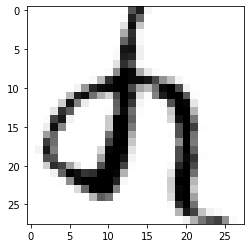

LABEL: 8


In [21]:
#search for misclassified samples among the first 1000
mask=np.logical_and(logreg.predict(X_test_norm[:1000])!=y_test[:1000],best_SVM.predict(X_test[:1000])==y_test[:1000])
# grab 3 of them because the plot_input() function expects arrays and not a single sample
sample=X_test[:1000][mask][:3]
label=y_test[:1000][mask][:3]
LR_prediction =  logreg.predict(sample)
SVM_prediction = best_SVM.predict(sample)

plot_input(sample,label,0)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
from sklearn.metrics import confusion_matrix


np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

# I ACTUALLY COMMENTED OUT THE PRINTING OF THE CONFUSION MATRIX BECAUSE ConfusionMatrixDisplay 
# from sklearn implements a matplotlib script to get a better visualization
# so I will use that.

confusion_SVM = confusion_matrix(y_test,best_SVM.predict(X_test))
# print("\n Confusion matrix SVM  \n \n", confusion_SVM)
# print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  confusion_matrix(y_test,logreg.predict(X_test_norm))
# print("\n Confusion matrix LR  \n \n", confusion_LR)
# print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5742 5709 5719 5708 5688 5689 5716 5661 5682 5686]


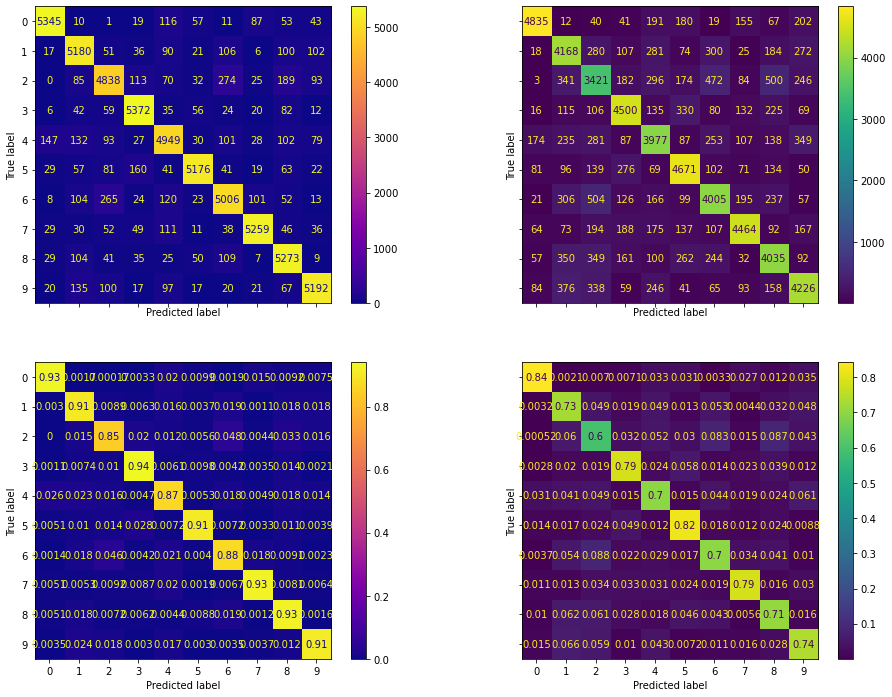

In [23]:
# Now we use ConfusionMatrixDisplay to get a better view of what's going on.


from sklearn.metrics import ConfusionMatrixDisplay

fig,axes = plt.subplots(figsize=(16,12),nrows=2,ncols=2,sharex=True,sharey=True)
ConfusionMatrixDisplay(confusion_SVM).plot(ax=axes[0,0],cmap='plasma') # plasma color map is assigned to SVM confusion matrices
ConfusionMatrixDisplay(confusion_LR).plot(ax=axes[0,1])
ConfusionMatrixDisplay(confusion_SVM/counts[:,None]).plot(ax=axes[1,0],cmap='plasma')
ConfusionMatrixDisplay(confusion_LR/counts[:,None]).plot(ax=axes[1,1])
plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


**ANSWER** Some classes are harder to classify both for SVM and the Logistic Regression classifier. If we take a closer look at the confusion matrix, a considerable amount of samples with label `2` were predicted to be `6` by both SVM and LogReg. If we plot some of these samples (code below) we can see that the Kuzushiji do appear to have a similar structure, thus making it reasonable to expect them being close enough in the feature space to be misclassified by the model.

INPUT:


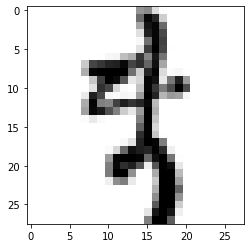

LABEL: 6
INPUT:


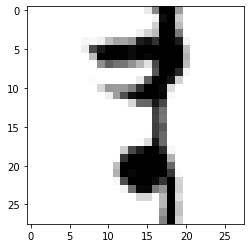

LABEL: 6
INPUT:


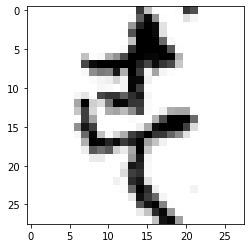

LABEL: 2
INPUT:


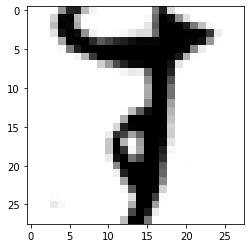

LABEL: 2


In [24]:
plot_input(X_test[y_test == 6],y_test[y_test==6],0)
plot_input(X_test[y_test == 6],y_test[y_test==6],2)

plot_input(X_test[y_test == 2],y_test[y_test==2],0)
plot_input(X_test[y_test == 2],y_test[y_test==2],2)
